In [1]:
import pandas as pd
import numpy as np
import cv2

In [3]:
import os
print(os.listdir("/PneumoniaDetection/input"))

['chest_xray', 'Images']


In [5]:
print(os.listdir("/PneumoniaDetection/input/chest_xray"))

['test', 'train', 'val']


In [1]:
train_data = '/PneumoniaDetection/input/chest_xray/train/'
test_data = '/PneumoniaDetection/input/chest_xray/test/'
val_data = '/PneumoniaDetection/input/chest_xray/val/'

In [9]:
import cv2

In [11]:
# Let us see no of images in Normal and Pneumonia folders of train folder through graph
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Each folder items numbers')

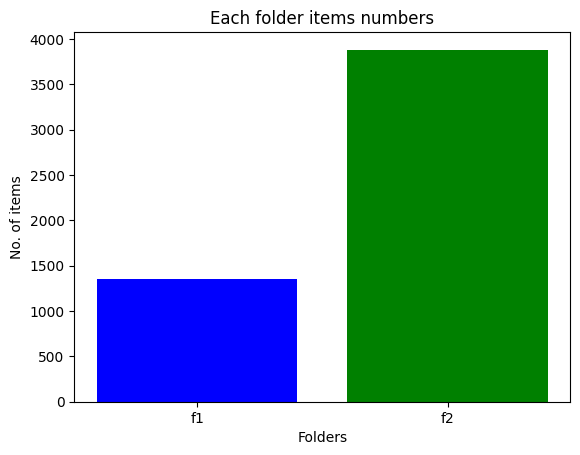

In [13]:
f1 = "/PneumoniaDetection/input/chest_xray/train/NORMAL"
f2 = "/PneumoniaDetection/input/chest_xray/train/PNEUMONIA"

c1 = len(os.listdir(f1))
c2 = len(os.listdir(f2))

folder = ['f1', 'f2']
counts = [c1, c2]

#Plotting
plt.bar(folder, counts, color=['blue', 'green'])

plt.xlabel("Folders")
plt.ylabel("No. of items")
plt.title("Each folder items numbers")

In [7]:
def get_data(dir, img_size = (150, 150)):
    """
    Loads image file paths and their corresponding labels from the given base directory.
    Assumes images are stored in 'Normal' (label 0) and 'Pneumonia' (label 1) folders.
    
    :param base_dir: Path to the dataset directory (train, test, or val)
    :return: List of (image_path, label) tuples
    """
    data = []
    labels = []
    
    # Define class labels
    class_labels = {"NORMAL": 0, "PNEUMONIA": 1}
    
    # Loop through Normal and Pneumonia folders
    for category, label in class_labels.items():
        folder_path = os.path.join(dir, category)
        
        # Check if folder exists
        if os.path.exists(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)

                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, img_size)

                    data.append(img)
                    labels.append(label)
                else:
                    print("Not found")
    print(f"Total images loaded: {len(data)}")
    return np.array(data), np.array(labels, dtype= np.int32)

In [9]:
train_images, train_labels = get_data(train_data, img_size=(150, 150))
test_images, test_labels = get_data(test_data, img_size=(150, 150))
val_images, val_labels = get_data(val_data, img_size = (150, 150))

NameError: name 'os' is not defined

In [19]:
val_images, val_labels = get_data(val_data, img_size = (150, 150))

Total images loaded: 24


normal picture title:  IM-0115-0001.jpeg


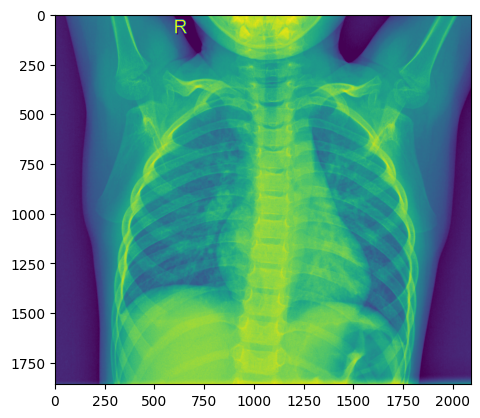

In [21]:
from PIL import Image
#Now, we have loaded resized images in an array and have corresponding label array
# Also we have converted X-Ray images to gray-scale as it helps in feature extraction

# Let us now see images from both Normal train folder and the np array we have created

train_n = train_data+'NORMAL/'
train_p = train_data+'PNEUMONIA/'

norm_pic = os.listdir(train_n)[0]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
norm_load = Image.open(norm_pic_address)
img_plot = plt.imshow(norm_load)



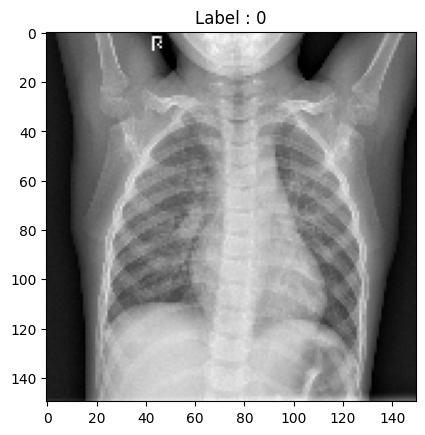

In [23]:
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label : {train_labels[0]}")

plt.show()

normal picture title:  person1000_virus_1681.jpeg


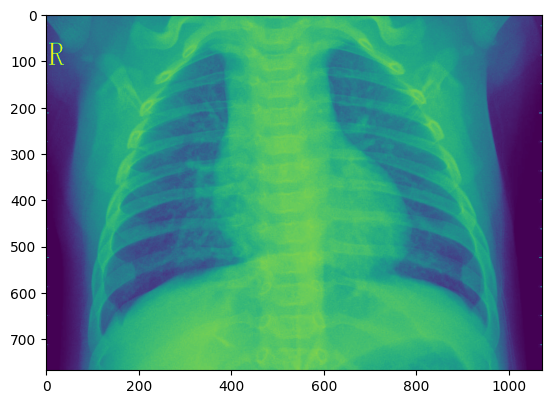

In [25]:
#Let us preview image of Pneumonia class too

pneu_pic = os.listdir(train_p)[1]
print('normal picture title: ',pneu_pic)
pneu_pic_address = train_p+pneu_pic
pneu_load = Image.open(pneu_pic_address)
img_plot = plt.imshow(pneu_load)

In [27]:
# Lets Normalize the data
train_images = train_images / 255
test_images = test_images / 255
val_images = val_images / 255

In [31]:
# Resizing data to use in Neural Network
img_size = 150
train_images = train_images.reshape(-1, img_size, img_size, 1)
test_images = test_images.reshape(-1, img_size, img_size, 1)
val_images = val_images.reshape(-1, img_size, img_size, 1)

In [33]:
from keras.preprocessing.image import ImageDataGenerator

In [39]:
# We are doing Data Augmentation to prevent overfitting and handling the imbalance in the dataset

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False    # randomly flip images
)  
datagen.fit(train_images)
# For Data _ Augmentation we have - 
# Randomly rotate some training images by 30 degrees
# Randomly Zoom by 20% some training images
# Randomly shift images horizontally by 10% of the width
# Randomly shift images vertically by 10% of the height
# Randomly flip images horizontally. Once our model is ready, we fit the training dataset.

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau

In [47]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_1 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_2 (Bat  (None, 75, 75, 64)       

In [51]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1,
                                            factor = 0.3, min_lr = 0.000001)

In [55]:
cnn_model = model.fit(datagen.flow(train_images, train_labels, batch_size = 32), epochs = 12,
                     validation_data = datagen.flow(val_images, val_labels), 
                      callbacks = [learning_rate_reduction])

Epoch 1/12
164/164 [==============================] - 135s 810ms/step - loss: 0.5332 - accuracy: 0.8341 - val_loss: 10.8650 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
164/164 [==============================] - 134s 819ms/step - loss: 0.2709 - accuracy: 0.8890 - val_loss: 49.8243 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
164/164 [==============================] - ETA: 0s - loss: 0.2504 - accuracy: 0.9146
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
164/164 [==============================] - 136s 825ms/step - loss: 0.2504 - accuracy: 0.9146 - val_loss: 10.6638 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
164/164 [==============================] - 136s 826ms/step - loss: 0.1508 - accuracy: 0.9474 - val_loss: 34.5417 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/12
164/164 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9518
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
164/164 [==============

In [61]:
# Now as we can see Validation accuracy is pretty good, so we can test it on our test set

loss = model.evaluate(test_images, test_labels)[0]
accuracy = model.evaluate(test_images, test_labels)[1]*100

print(f"Loss is {loss}")
print(f"Accuracy is {accuracy} %")

20/20 [==============================] - 3s 139ms/step - loss: 0.3118 - accuracy: 0.8766
Loss is 0.3118390738964081
Accuracy is 87.66025900840759 %


In [65]:
# As we can see our model accuracy is pretty good so lets save this model and predict 
# Pneumonia in X-Ray images on basis of this

model.save("cnn_model.keras")

In [117]:
print(classification_report(test_labels, predictions,
                           target_names = ['Pneumonia (Class 0)', 'Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.77      0.96      0.85       234
   Normal (Class 1)       0.97      0.83      0.89       390

           accuracy                           0.88       624
          macro avg       0.87      0.89      0.87       624
       weighted avg       0.89      0.88      0.88       624



<Axes: >

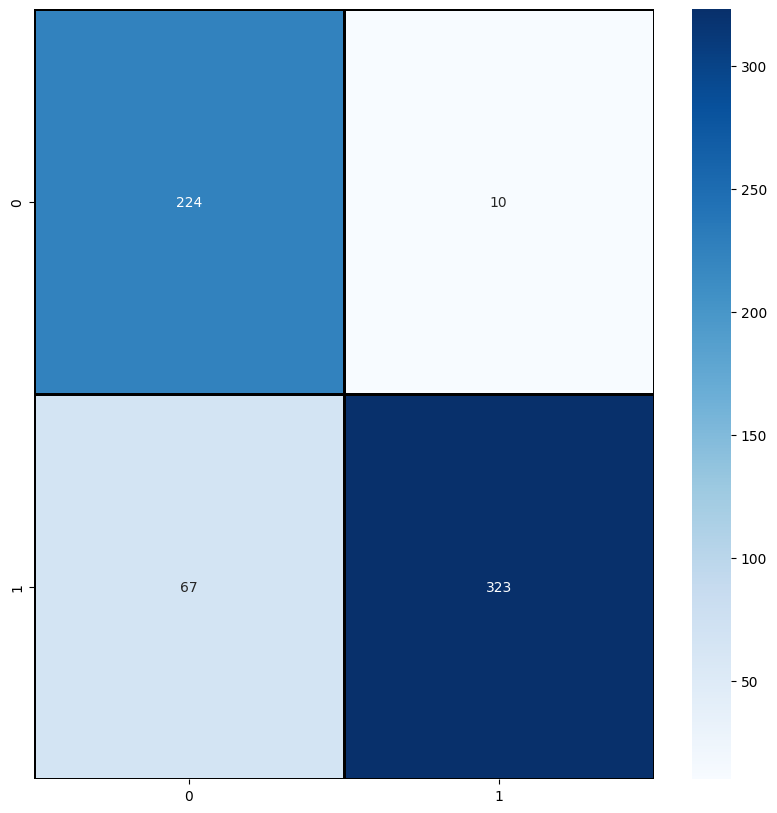

In [127]:
import seaborn as sns

cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 ,
            annot = True, fmt='')

In [131]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_1 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_2 (Bat  (None, 75, 75, 64)       

In [3]:
import tensorflow as tf
model = tf.keras.models.load_model('cnn_model.keras')
predictions = model.predict(test_images)

# Convert to binary predictions
predicted_classes = (predictions)
# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)
print(cm)

NameError: name 'test_images' is not defined

In [60]:
# # We have make image grayscale to reduce the effect of illumination's differences. Moreover the CNN coverges faster on [0...1] data than on [0....255]

# # As we can see previously that that images data in Normal in comparison to Pneumonia is very
# # much less than Pneumonia folder, so we must apply augmentation to reduce class imbalance 
# # and avoid the problem of overfittig

# f1 = "/PneumoniaDetection/input/chest_xray/train/NORMAL"
# f2 = "/PneumoniaDetection/input/chest_xray/train/PNEUMONIA"

# c1 = len(os.listdir(f1))
# c2 = len(os.listdir(f2))

# print(c1, c2)

1349 3883


In [62]:
# As we can see number of images in Pneumonia folder is nearly three times, so we will apply 
# Albumentations augmentation with para = 3, then it will ensure that class imbalance removes fully

# As our data is already in np array we just have to create augmentation function and apply it

import albumentations as A

#PipeLine

transform = A.Compose([
    A.Rotate(limit=30, p=0.7),
    A.RandomScale(scale_limit=0.2, p=0.7),
    A.Resize(height=150, width=150, p=1),
    A.ShiftScaleRotate(shift_limit_x=0.1, shift_limit_y=0.1, scale_limit=0, rotate_limit=0, p=0.7),
    A.Normalize(mean=[0.5], std=[0.5])
])

def augment_images(images, num_arguments=3):
    augmented_images = []

    for img in images:
        for _ in range(num_arguments):
            augmented = transform(image=img)['image']
            augmented_images.append(augmented)
    return np.array(augmented_images, dtype=np.float32)

In [64]:
# def get_folder(folder_path):
#     data = []
#     img_size = [150,150]
#     for filename in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, filename)
#         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         if img is not None:
#             img = cv2.resize(img, img_size)
#             # img = img / 255.0
#             data.append(img)
#     return np.array(data)

In [66]:
# # We just have to augment normal images, now let us augment validation dataset

# v1 = "/PneumoniaDetection/input/chest_xray/val/NORMAL"
# v2 = "/PneumoniaDetection/input/chest_xray/val/PNEUMONIA"
# val_n_data  = get_folder(v1)
# val_p_data  = get_folder(v2)
# val_normal_images = augment_images(val_n_data,3)
# val_pneu_images = augment_images(val_p_data,3)

In [68]:
# print(val_normal_images.shape)

(900, 150, 150)


In [70]:
# normal_images_to_augment = get_folder(f1)

In [71]:
# normal_augmented = augment_images(normal_images_to_augment, num_arguments= 3)

In [72]:
# print(len(normal_augmented))
# print(val_normal_images.shape)

4047
(900, 150, 150)


In [76]:
# #As we can now see number of normal images and pneumonia images are nearly equal we can now 
# # Train our CNN model on this GrayScale Resized Images
# # Firstly lets balance images in Images_train by removing old nromal images and adding new augmented images

# def remove_first_n(train_images, train_labels, n):
#     """
#     Removes the first n images and corresponding labels from train_images and train_labels.

#     Args:
#         train_images (np.array): Array of images.
#         train_labels (np.array): Array of labels.
#         n (int): Number of images and labels to remove.

#     Returns:
#         tuple: A tuple containing the updated train_images and train_labels.
#     """

#     if n >= len(train_images):
#         return np.array([]), np.array([])  # Return empty arrays if n is too large

#     updated_images = train_images[n:]
#     updated_labels = train_labels[n:]

#     return np.array(updated_images), (updated_labels)

# updated_train_images, updated_train_labels = remove_first_n(train_images, train_labels, 1349)

In [78]:
def add_images_label_0(train_images_, train_labels_, new_images):

    num_new_images = len(new_images)
    new_labels = np.zeros(num_new_images, dtype=int)  # Create array of zeros

    updated_images = np.concatenate((train_images_, new_images))
    updated_labels = np.concatenate((train_labels_, new_labels))

    return np.array(updated_images), np.array(updated_labels)
    
def add_images_label_1(val_images_, val_labels_, new_images):

    num_new_images = len(new_images)
    new_labels = np.ones(num_new_images, dtype=int)  # Create array of zeros

    updated_images = np.concatenate((val_images_, new_images))
    updated_labels = np.concatenate((val_labels_, new_labels))

    return np.array(updated_images), np.array(updated_labels)

In [80]:
# # Now we are going to add pre existing images array with augmented normal images array

# final_train_images, final_train_labels = add_images_label_0(updated_train_images, updated_train_labels, normal_augmented)

# final_val_images = np.empty((0, 150, 150))
# final_val_labels = np.empty(0)

# final_val_images, final_val_labels = add_images_label_0(final_val_images,final_val_labels, val_normal_images)
# final_val_images, final_val_labels = add_images_label_1(final_val_images,final_val_labels, val_pneu_images)

In [82]:
# So the final train-images and label arrays are - final_train_images, final_train_labels
# Final val arrays are - final_val_images, final_val_labels

# All these things are augmented and in proper form

In [84]:
print(final_val_images.shape)
print(len(final_val_labels))

(1800, 150, 150)
1800


In [86]:
# As our Xray images are not too complex so we are going to build our neural
# network only two layers deep

# Firstly lets import all necessary libraries 
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
model = Sequential()

#Layer1 
model.add(Conv2D(32,(3,3), activation = "relu", input_shape=(150, 150,1)))

model.add(MaxPooling2D(pool_size = (2,2)))

#Layer2
model.add(Conv2D(64, (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [101]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_redu = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1,
                                      factor = 0.3, min_lr=0.000001)